# Importing Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data Preprocessing

In [30]:
# Load dataset
df = pd.read_csv('../data/Salary Data.csv')

# Preview
df.head() 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


##  Initial Dataset Check

In [32]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [33]:
# Summary statistics
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [34]:
# Check for missing values
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [35]:
# Drop Missing Values
df = df.dropna()

In [36]:
# Check for missing values
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [37]:
# Check unique values in categorical features
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [38]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [39]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

## Visual EDA

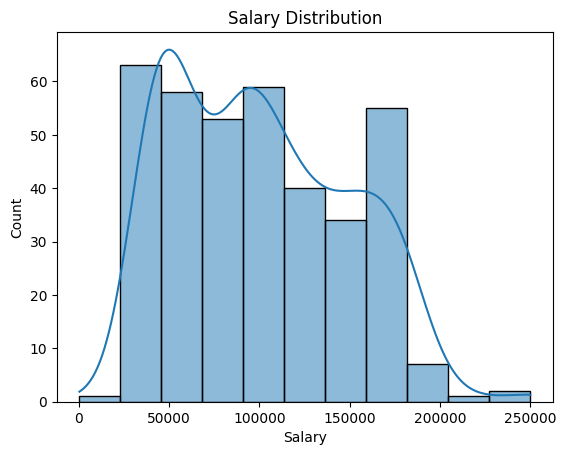

In [40]:
# Salary distribution
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.show()

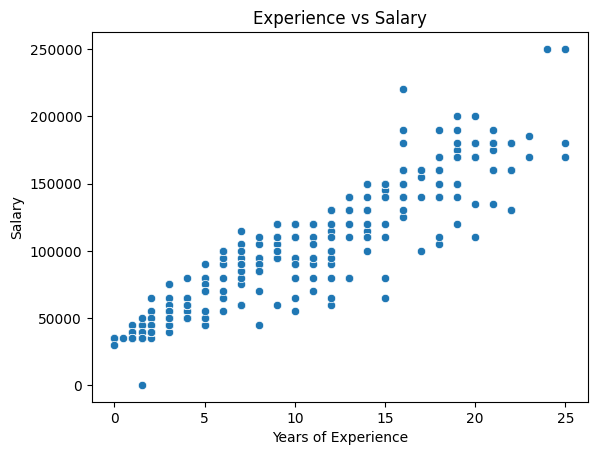

In [41]:
# Salary vs Years of Experience
sns.scatterplot(x='Years of Experience', y='Salary', data=df)
plt.title('Experience vs Salary')
plt.show()

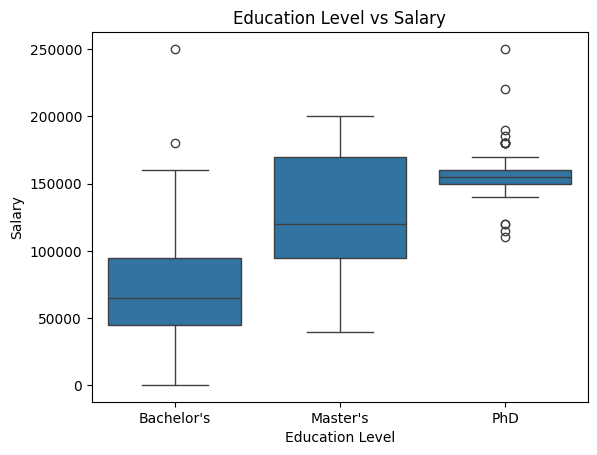

In [42]:
# Salary by Education Level
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title('Education Level vs Salary')
plt.show()

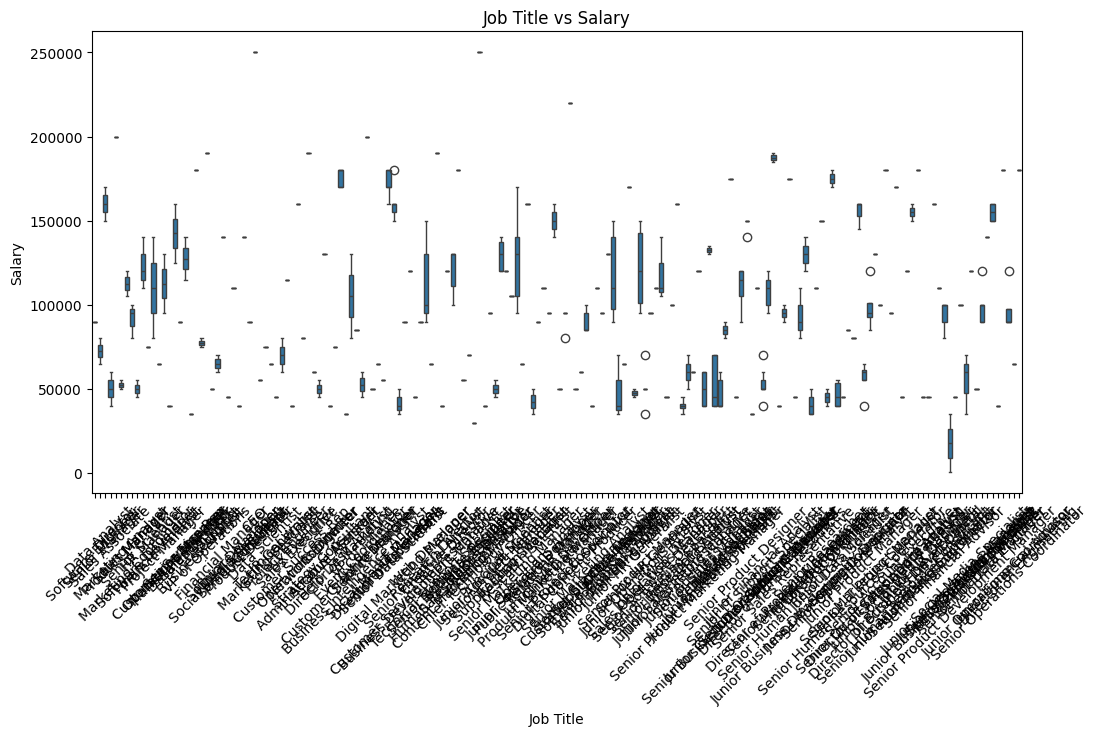

In [45]:
# Salary by Job Title
plt.figure(figsize=(12, 6))
sns.boxplot(x='Job Title', y='Salary', data=df)
plt.xticks(rotation=45)
plt.title('Job Title vs Salary')
plt.show()

## A. Handle Categorical Variables (Label Encoding or One-Hot Encoding)

In [46]:
# One-hot encode Gender, Education Level, Job Title
df_encoded = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)
df_encoded.head()

,Age,Years of Experience,Salary,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28.0,3.0,65000.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,15.0,150000.0,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,7.0,60000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,20.0,200000.0,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Feature Scaling (Optional for linear regression)

In [48]:
scaler = StandardScaler()
numeric_features = ['Age', 'Years of Experience']

df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])


## Define Features & Target

In [49]:
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']


##  Train a Linear Regression Model

In [51]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate the Model

In [54]:
# Predict
y_pred = model.predict(X_test)


In [55]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [56]:
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R² Score: 0.852
RMSE: 18821.49
MAE: 11596.52


## Plot actual vs predicted salaries

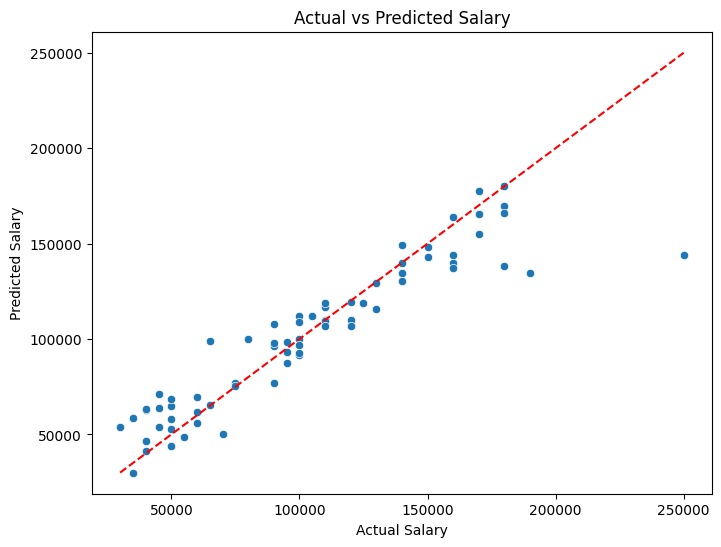

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # perfect prediction line
plt.show()


# Save the Model for Deployment

In [62]:
import os

# Create folder if it doesn't exist
os.makedirs("app", exist_ok=True)

# Then save the model
import joblib
joblib.dump(model, 'app/model.pkl')
joblib.dump(scaler, 'app/scaler.pkl')
joblib.dump(X.columns.tolist(), 'app/features.pkl')


['app/features.pkl']